# MAT281 - Laboratorio N°11

<a id='p1'></a>
## I.- Problema 01

Lista de actos delictivos registrados por el Service de police de la Ville de Montréal (SPVM).


<img src="http://henriquecapriles.com/wp-content/uploads/2017/02/femina_detenida-1080x675.jpg" width="480" height="360" align="center"/>

El conjunto de datos en estudio `interventionscitoyendo.csv` corresponde a  todos los delitos entre 2015 y agosto de 2020en Montreal. Cada delito está asociado en grandes categorías, y hay información sobre la ubicación, el momento del día, etc.

> **Nota**: Para más información seguir el siguiente el [link](https://donnees.montreal.ca/ville-de-montreal/actes-criminels).

In [1]:
# librerias 

import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from metrics_regression import *

import warnings
warnings.filterwarnings('ignore')

# graficos incrustados
plt.style.use('fivethirtyeight')
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (12, 4)})

In [2]:
# read data

validate_categorie = [
  'Introduction', 'Méfait','Vol dans / sur véhicule à moteur', 'Vol de véhicule à moteur',
]

df = pd.read_csv(os.path.join("data","interventionscitoyendo.csv"), sep=",", encoding='latin-1')
df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df = df.loc[lambda x: x['categorie'].isin(validate_categorie)]
df = df.sort_values(['categorie','date'])
df.head()

,categorie,date,quart,pdq,x,y,longitude,latitude
3462,Introduction,2015-01-01,jour,42.0,297210.375006,5.050179e+06,-73.597273,45.591480
8370,Introduction,2015-01-01,soir,13.0,297145.531007,5.032845e+06,-73.597834,45.435501
11968,Introduction,2015-01-01,nuit,8.0,289215.072000,5.036423e+06,-73.699308,45.467564
12763,Introduction,2015-01-01,soir,27.0,293203.472992,5.045436e+06,-73.648516,45.548740
13686,Introduction,2015-01-01,soir,44.0,298915.433995,5.046912e+06,-73.575381,45.562090


Como tenemos muchos datos por categoría a nivel de día, agruparemos a nivel de **semanas** y separaremos cada serie temporal.

In [3]:
cols = ['date','pdq']
y_s1 = df.loc[lambda x: x.categorie == validate_categorie[0] ][cols].set_index('date').resample('W').mean()
y_s2 = df.loc[lambda x: x.categorie == validate_categorie[1] ][cols].set_index('date').resample('W').mean()
y_s3 = df.loc[lambda x: x.categorie == validate_categorie[2] ][cols].set_index('date').resample('W').mean()
y_s4 = df.loc[lambda x: x.categorie == validate_categorie[3] ][cols].set_index('date').resample('W').mean()

El objetivo de este laboratorio es poder realizar un análisis completo del conjunto de datos en estudio, para eso debe responder las siguientes preguntas:

1. Realizar un gráfico para cada serie temporal $y\_{si}, i =1,2,3,4$.


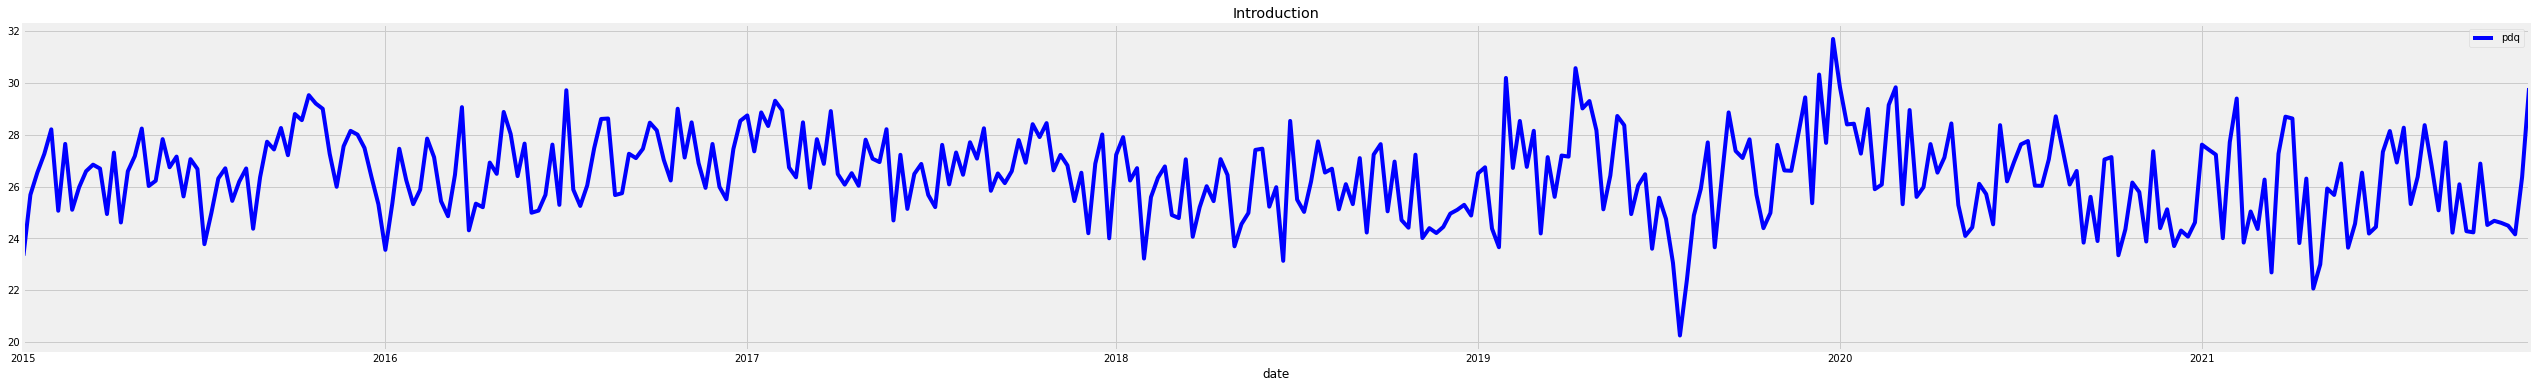

In [4]:
# graficar datos s1
y_s1.plot(figsize=(40, 6),color = 'blue')
plt.title(validate_categorie[0]) # agregar titulo
plt.show()

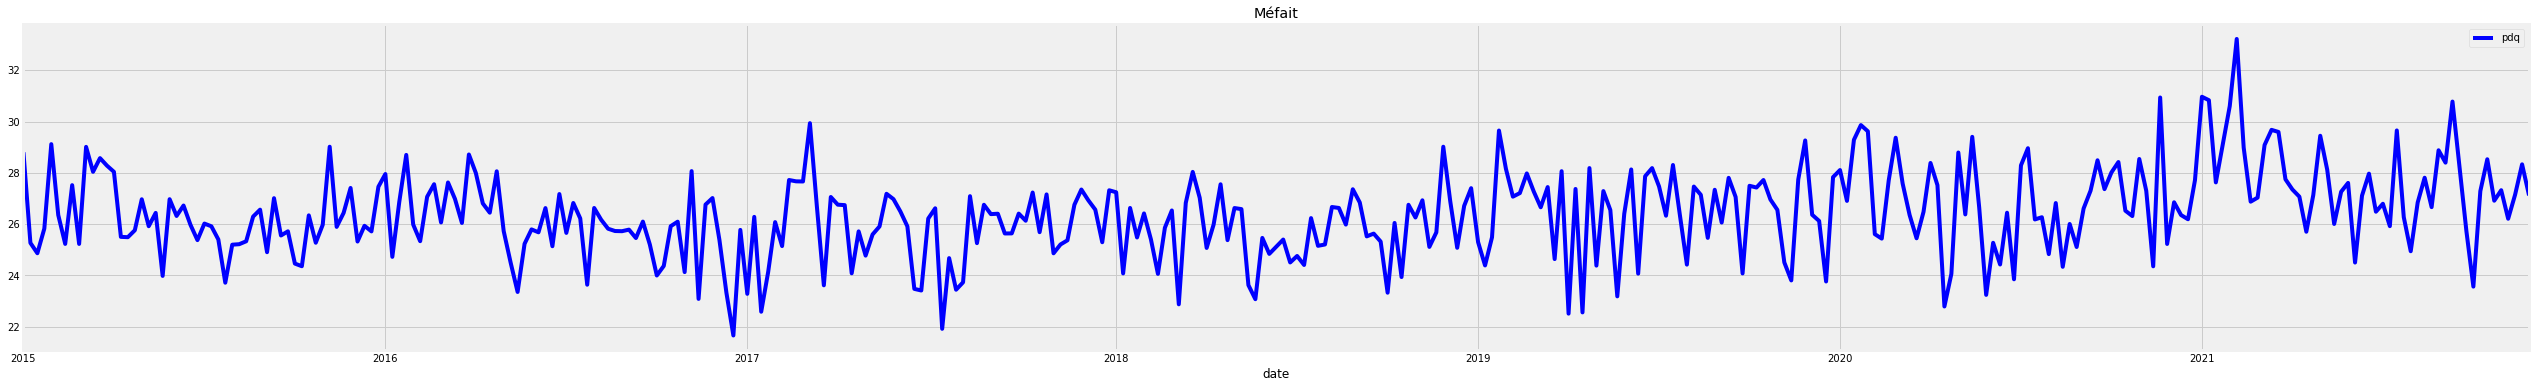

In [5]:
# graficar datos s2
y_s2.plot(figsize=(40, 6),color = 'blue')
plt.title(validate_categorie[1]) # agregar titulo
plt.show()

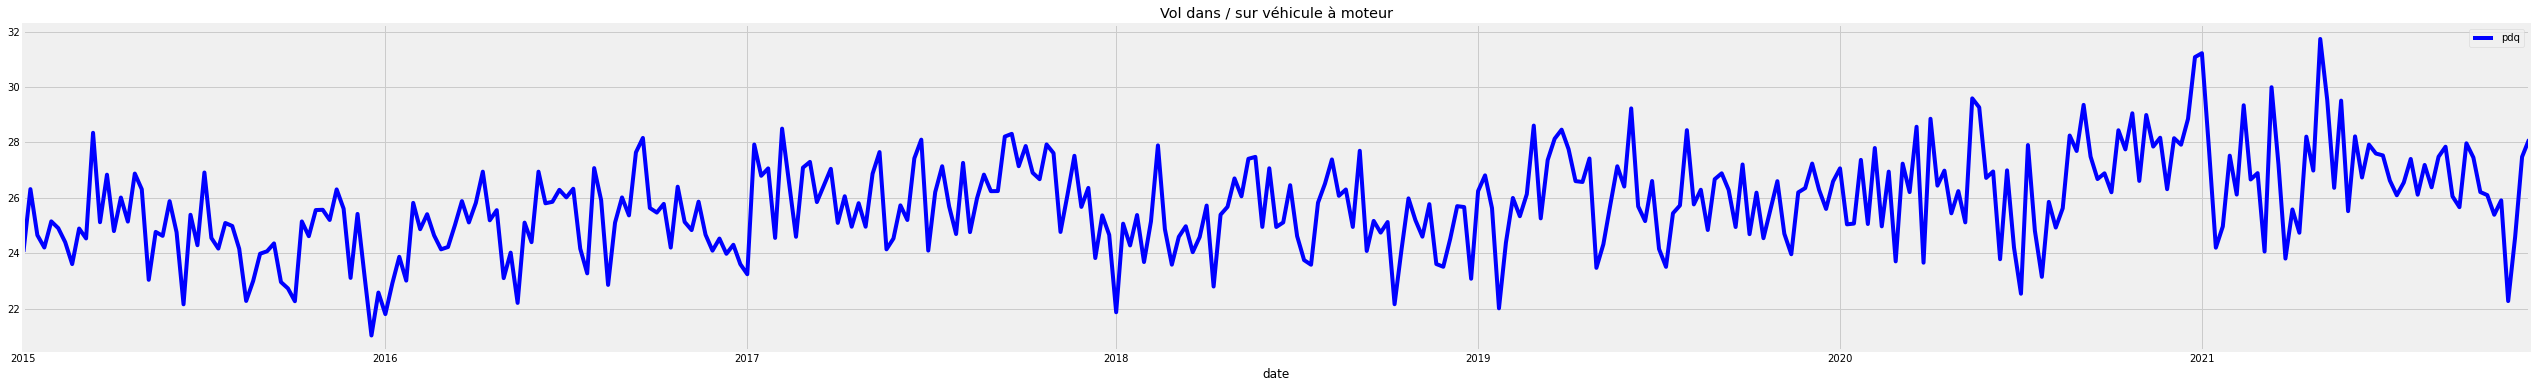

In [6]:
# graficar datos s3
y_s3.plot(figsize=(40, 6),color = 'blue')
plt.title(validate_categorie[2]) # agregar titulo
plt.show()

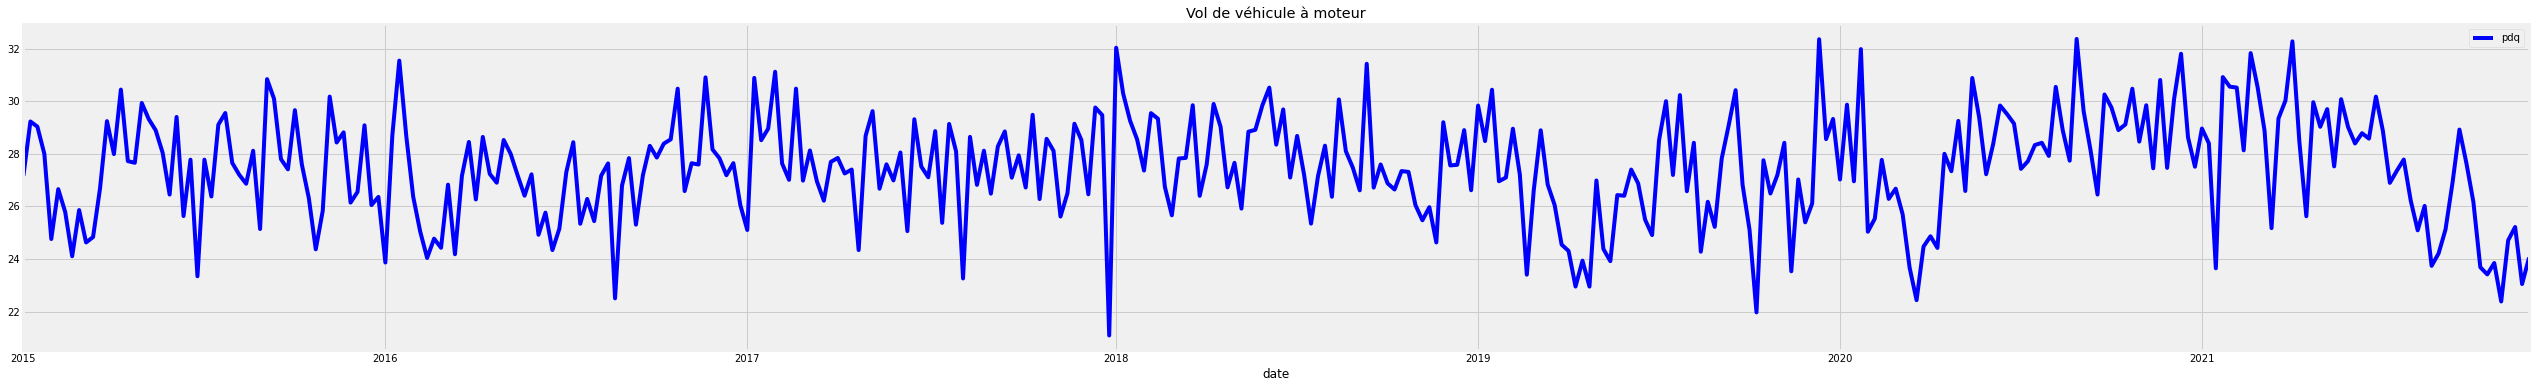

In [7]:
# graficar datos s4
y_s4.plot(figsize=(40, 6),color = 'blue')
plt.title(validate_categorie[3]) # agregar titulo
plt.show()

2. Escoger alguna serie temporal $y\_{si}, i =1,2,3,4$. Luego:

* Realice un análisis exploratorio de la serie temporal escogida
* Aplicar el modelo de pronóstico $SARIMA(p,d,q)x(P,D,Q,S)$, probando varias configuraciones de los hiperparámetros. Encuentre la mejor configuración. Concluya.
* Para el mejor modelo encontrado, verificar si el residuo corresponde a un ruido blanco.

> **Hint**: Tome como `target_date` =  '2021-01-01'. Recuerde considerar que su columna de valores se llama `pdq`.


In [8]:
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt

Escogeremos la serie temporal y_s1

In [9]:
y_s1

,pdq
date,
2015-01-04,23.337079
2015-01-11,25.687861
2015-01-18,26.547170
2015-01-25,27.267016
2015-02-01,28.213018
...,...
2021-10-31,24.603306
2021-11-07,24.494949
2021-11-14,24.160000


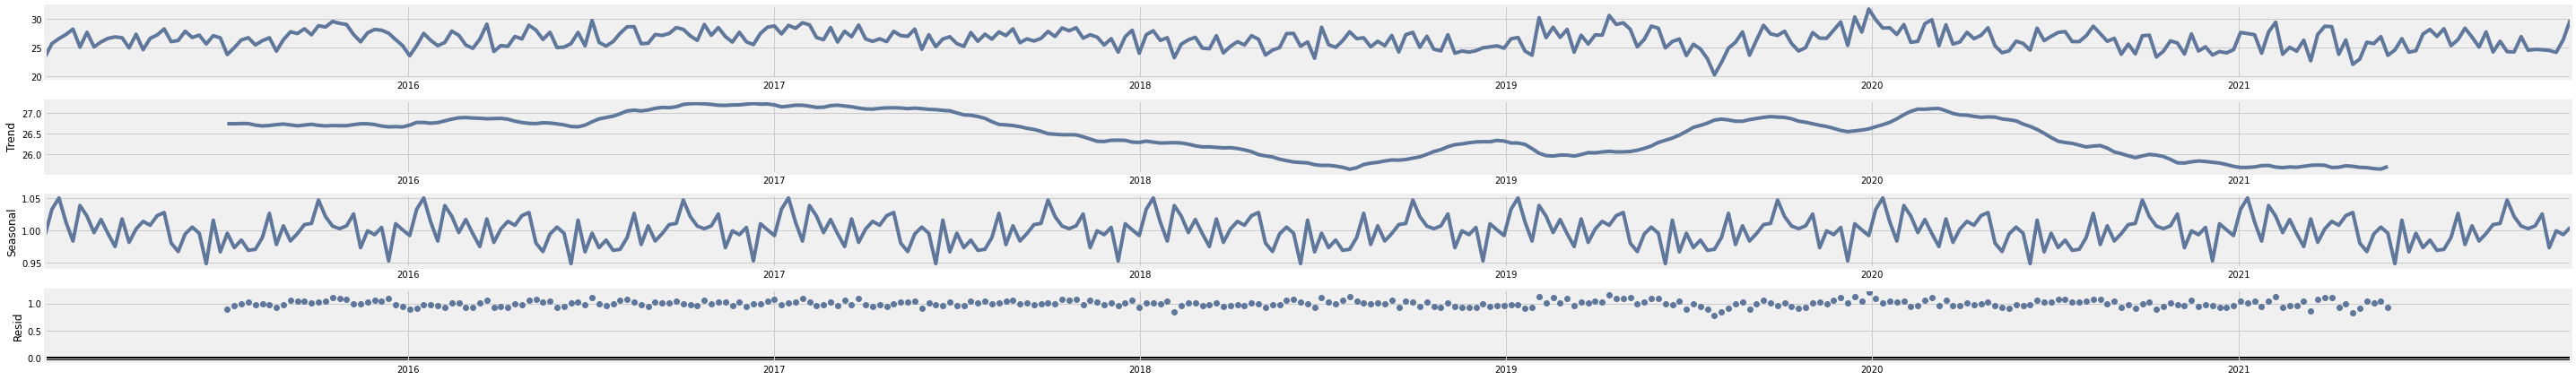

In [10]:
rcParams['figure.figsize'] = 40, 6
decomposition = sm.tsa.seasonal_decompose(y_s1, model='multiplicative')
fig = decomposition.plot()
plt.show()

gráfico 01 (serie original): este gráfico simplemente nos muestra la serie original graficada en el tiempo.

gráfico 02 (tendencia): este gráfico nos muestra la tendencia de la serie.

gráfico 03 (estacionariedad): este gráfico nos muestra la estacionariedad de la serie.

gráfico 04 (error): este gráfico nos muestra el error de la serie.

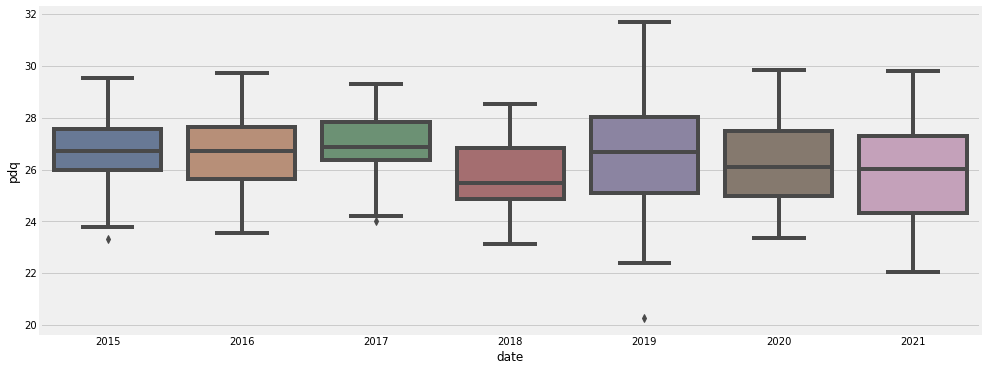

In [11]:
# diagrama de caja y bigotes
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x = y_s1.index.year, y = y_s1.pdq, ax=ax)
plt.show()

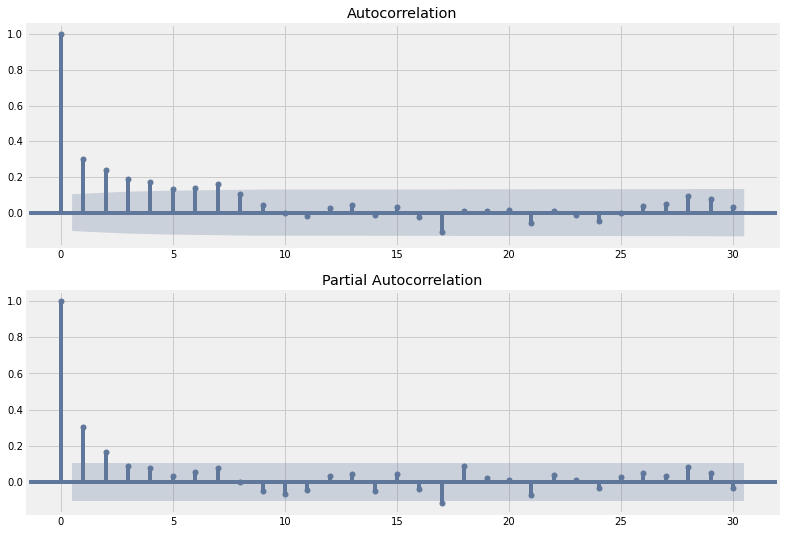

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(12,9))

# acf
pyplot.subplot(211)
plot_acf(y_s1.pdq, ax=pyplot.gca(), lags = 30)

#pacf
pyplot.subplot(212)
plot_pacf(y_s1.pdq, ax=pyplot.gca(), lags = 30)
pyplot.show()

In [13]:
y_diff = y_s1.diff()

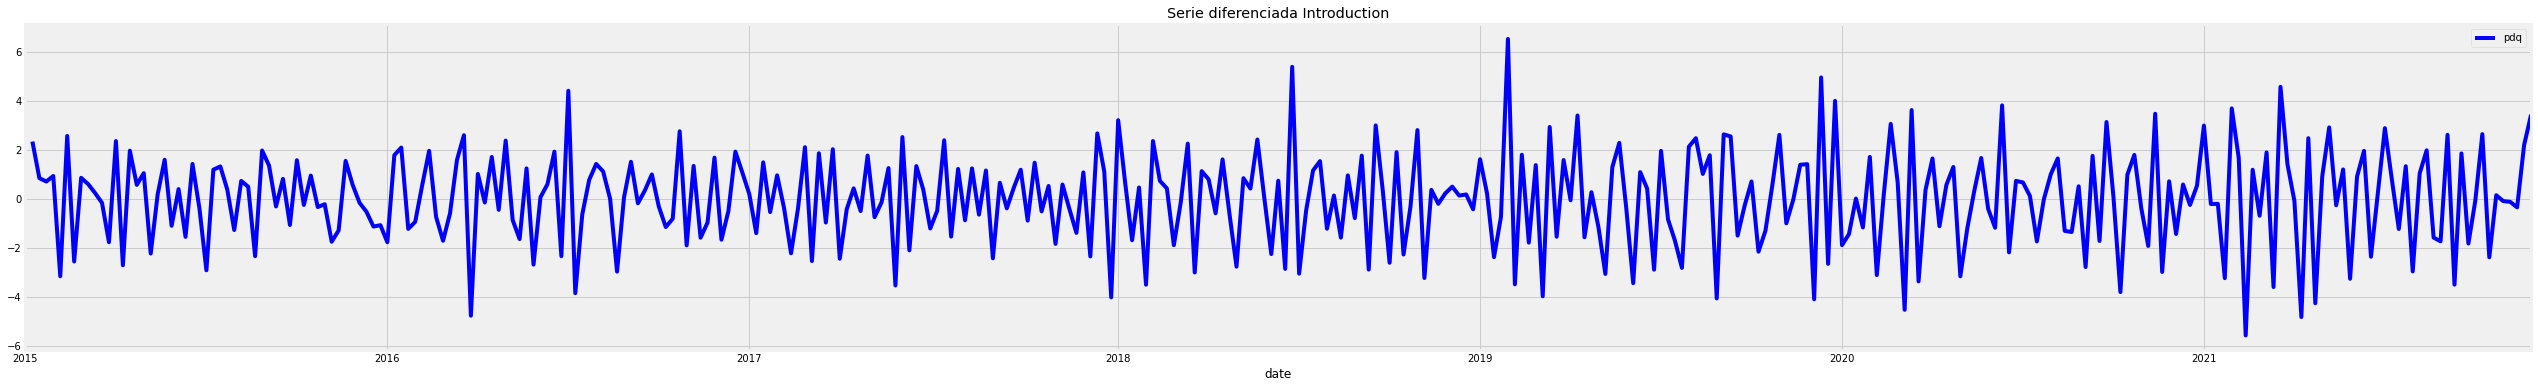

In [14]:
y_diff.plot(figsize=(40, 6),color = 'blue')
plt.title("Serie diferenciada "+validate_categorie[0]) # agregar titulo
plt.show()

In [15]:
def box_transformations(y,param):
    if param>0:
        return y_s1.apply(lambda x: (x**(param)-1)/param)
    elif param==0:
        return np.log(y_s1)
    else:
        print("lambda es negativo, se devulve la serie original")
        return y_s1

In [16]:
# logaritmo

y_log = box_transformations(y_s1,0)

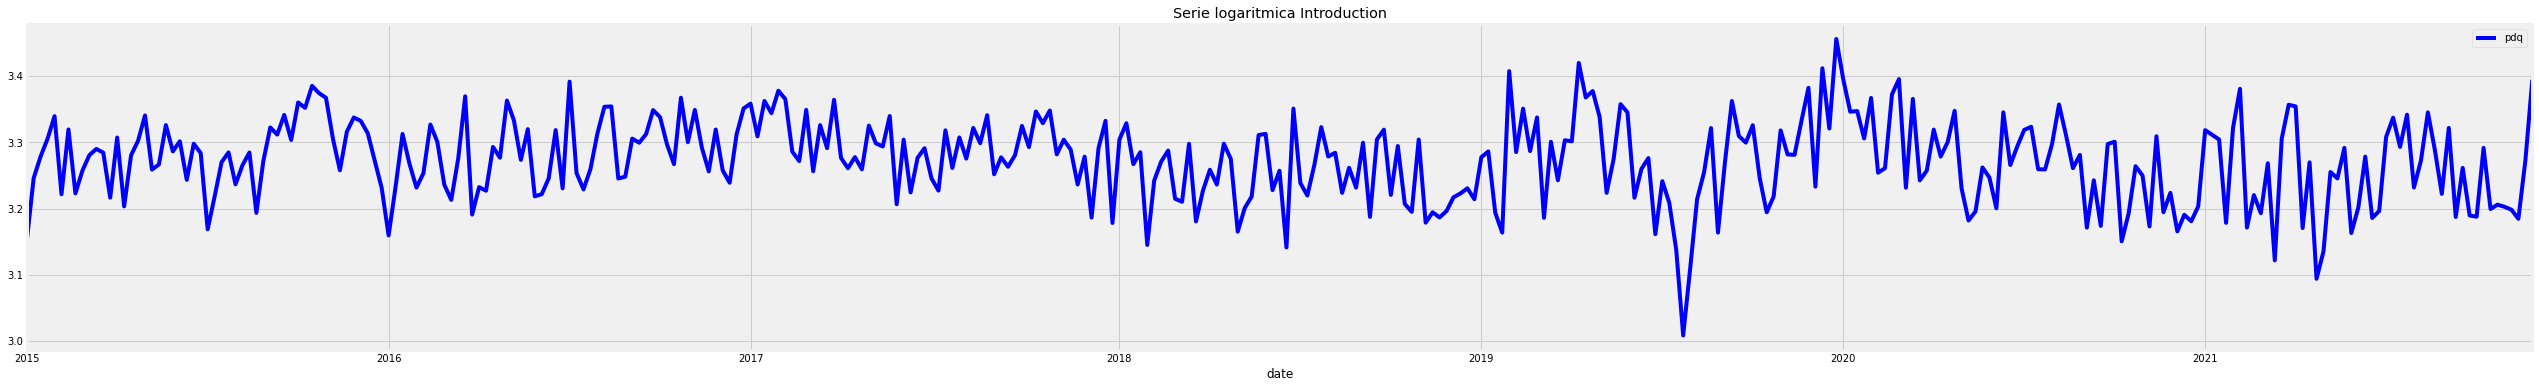

In [17]:
y_log.plot(figsize=(40, 6),color = 'blue')
plt.title("Serie logaritmica "+validate_categorie[0]) # agregar titulo
plt.show()

In [18]:
# cuadratica

y_quad = box_transformations(y_s1,2)

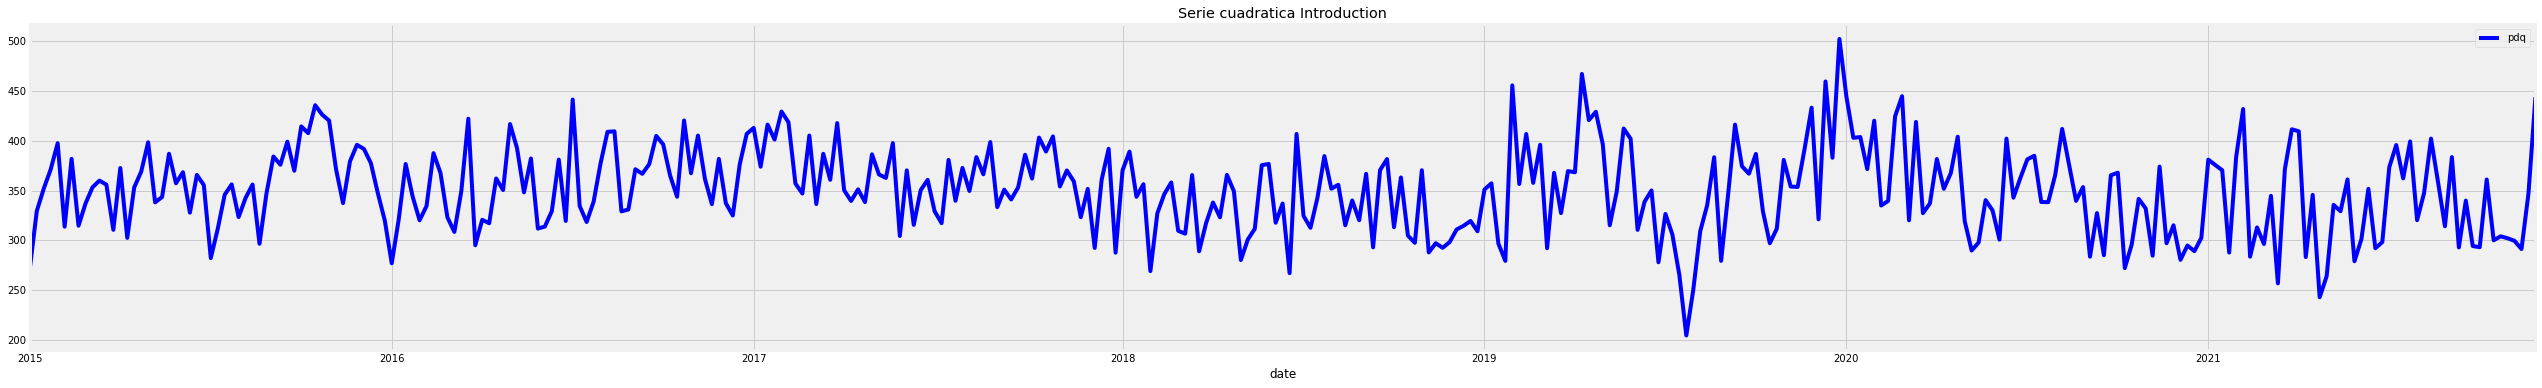

In [19]:
y_quad.plot(figsize=(40, 6),color = 'blue')
plt.title("Serie cuadratica "+validate_categorie[0]) # agregar titulo
plt.show()

## Aplicar el modelo de pronóstico  𝑆𝐴𝑅𝐼𝑀𝐴(𝑝,𝑑,𝑞)𝑥(𝑃,𝐷,𝑄,𝑆) , probando varias configuraciones de los hiperparámetros. Encuentre la mejor configuración. Concluya.

In [20]:
# creando clase SarimaModels

class SarimaModels:
    def __init__(self,params):

        self.params = params
        
        
    @property
    def name_model(self):
        return f"SARIMA_{self.params[0]}X{self.params[1]}".replace(' ','')
    
    @staticmethod
    def test_train_model(y,date):
        mask_ds = y.index < date

        y_train = y[mask_ds]
        y_test = y[~mask_ds]        
        
        return y_train, y_test
    
    def fit_model(self,y,date):
        y_train, y_test = self.test_train_model(y,date )
        model = SARIMAX(y_train,
                        order=self.params[0],
                        seasonal_order=self.params[1],
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        
        model_fit = model.fit(disp=0)

        return model_fit
    
    def df_testig(self,y,date):
        y_train, y_test = self.test_train_model(y,date )
        model = SARIMAX(y_train,
                        order=self.params[0],
                        seasonal_order=self.params[1],
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        
        model_fit = model.fit(disp=0)
        
        start_index = y_test.index.min()
        end_index = y_test.index.max()

        preds = model_fit.get_prediction(start=start_index,end=end_index, dynamic=False)
        df_temp = pd.DataFrame(
            {
                'y':y_test['pdq'],
                'yhat': preds.predicted_mean
            }
        )
        
        return df_temp
    
    def metrics(self,y,date):
        df_temp = self.df_testig(y,date)
        df_metrics = summary_metrics(df_temp)
        df_metrics['model'] = self.name_model
        
        return df_metrics

In [21]:
# definir parametros 

import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

params = list(itertools.product(pdq,seasonal_pdq))
target_date = '2021-01-01'

In [22]:
# iterar para los distintos escenarios
frames = []
for param in params:
    try:
        sarima_model = SarimaModels(param)
        df_metrics = sarima_model.metrics(y_s1,target_date)  #cambiar serie
        frames.append(df_metrics)
    except:
        pass

In [23]:
# juntar resultados de las métricas y comparar
df_metrics_result = pd.concat(frames)
df_metrics_result.sort_values(['mae','mape'])

,mae,mse,rmse,mape,maape,wmape,mmape,smape,model
0,1.5876,3.4224,1.8500,0.0622,0.0620,0.0614,0.0599,0.0614,"SARIMA_(0,0,0)X(1,0,1,12)"
0,1.5934,3.4304,1.8521,0.0624,0.0622,0.0616,0.0600,0.0616,"SARIMA_(0,0,1)X(1,0,1,12)"
0,1.6021,3.4537,1.8584,0.0627,0.0625,0.0619,0.0603,0.0619,"SARIMA_(1,0,0)X(1,0,1,12)"
0,1.6444,3.7832,1.9451,0.0654,0.0651,0.0635,0.0629,0.0635,"SARIMA_(0,0,0)X(0,1,1,12)"
0,1.6444,3.7833,1.9451,0.0654,0.0651,0.0635,0.0629,0.0635,"SARIMA_(0,0,0)X(1,1,1,12)"
...,...,...,...,...,...,...,...,...,...
0,7.8111,73.7850,8.5898,0.2988,0.2862,0.3019,0.2877,0.3654,"SARIMA_(1,1,0)X(0,1,0,12)"
0,22.8403,550.3456,23.4594,0.8845,0.7122,0.8827,0.8514,1.6822,"SARIMA_(0,0,1)X(0,0,1,12)"
0,23.0209,560.5370,23.6757,0.8899,0.7147,0.8896,0.8567,1.7030,"SARIMA_(0,0,0)X(0,0,1,12)"
0,25.5633,660.3857,25.6980,0.9886,0.7779,0.9879,0.9517,1.9706,"SARIMA_(0,0,1)X(0,0,0,12)"


In [24]:
# ajustar mejor modelo

param = [(0,0,0),(1,0,1,12)]
sarima_model =  SarimaModels(param)
model_fit = sarima_model.fit_model(y_s1,target_date)
best_model = sarima_model.df_testig(y_s1,target_date)
best_model.head()

,y,yhat
2021-01-03,27.622449,26.158299
2021-01-10,27.425532,25.926903
2021-01-17,27.235294,26.083721
2021-01-24,24.012658,26.308888
2021-01-31,27.716418,26.074932


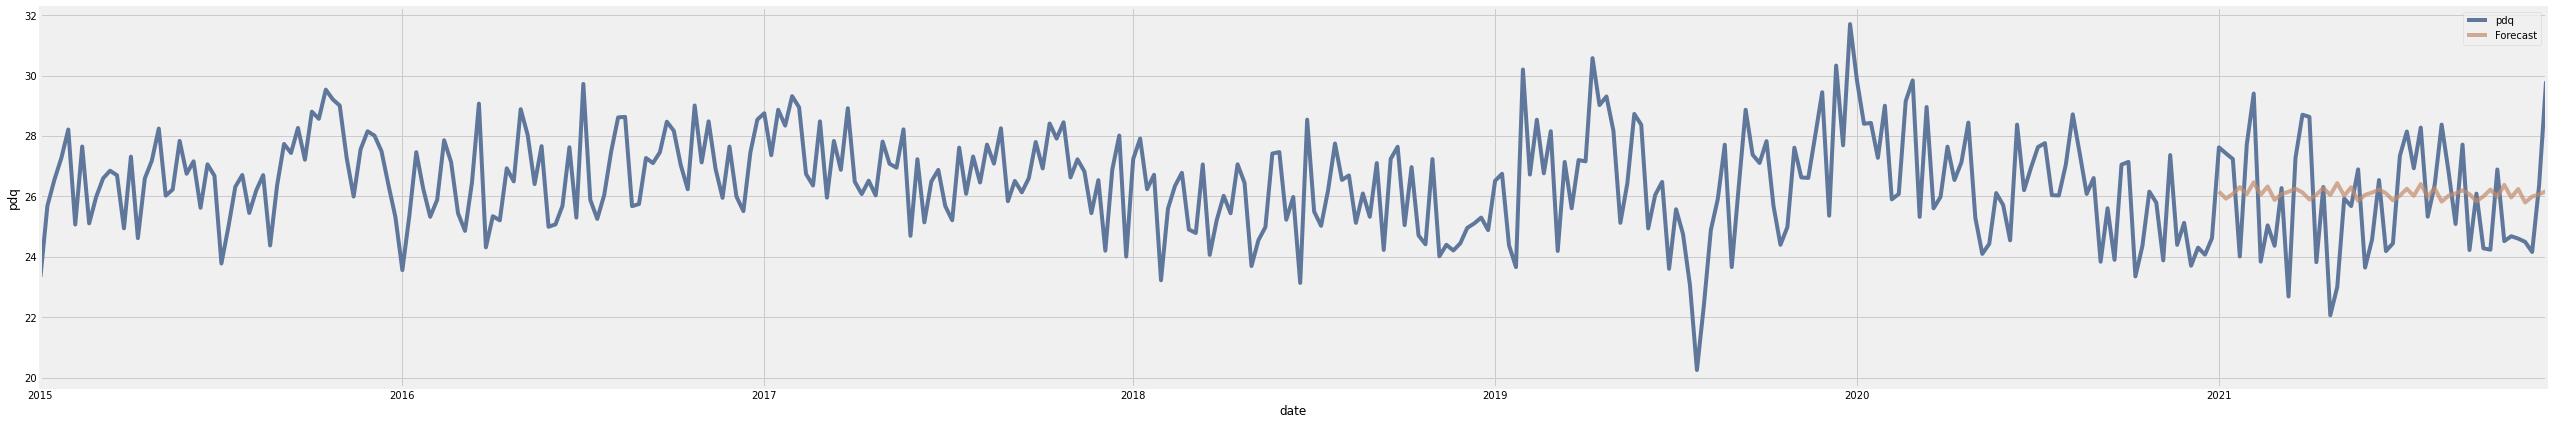

In [25]:
# graficar mejor modelo

preds = best_model['yhat']
ax = y_s1['2015':].plot(label='observed')
preds.plot(ax=ax, label='Forecast', alpha=.7, figsize=(40, 7))
ax.set_xlabel('date')
ax.set_ylabel('pdq')
plt.legend()
plt.show()

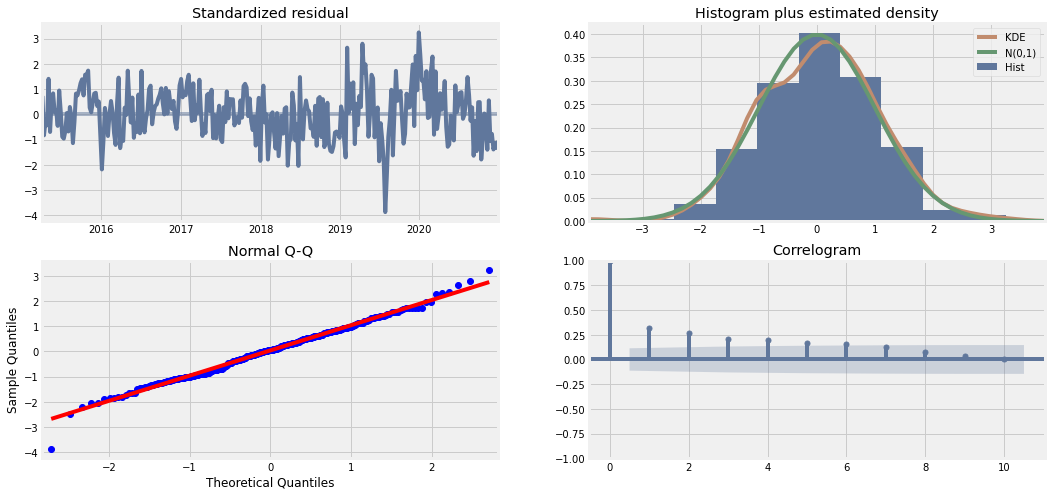

In [26]:
# resultados del error 
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

gráfico 01 (standarized residual): Este gráfico nos muestra el error estandarizado en el tiempo. En este caso se observa que esta nueva serie de tiempo corresponde a una serie estacionaria que oscila entorno al cero, es decir, un ruido blanco.

gráfico 02 (histogram plus estimated density): Este gráfico nos muestra el histograma del error. En este caso, el histograma es muy similar al histograma de una variable N(0,1) (ruido blanco).

gráfico 03 (normal QQ): el gráfico Q-Q (“Q” viene de cuantil) es un método gráfico para el diagnóstico de diferencias entre la distribución de probabilidad de una población de la que se ha extraído una muestra aleatoria y una distribución usada para la comparación. En este caso se comparar la distribución del error versus una distribución normal. Cuando mejor es el ajuste lineal sobre los puntos, más parecida es la distribución entre la muestra obtenida y la distribución de prueba (distribución normal).

gráfico 04 (correlogram): Este gráfico nos muestra el gráfico de autocorrelación entre las variables del error, se observa que no hay correlación entre ninguna de las variables, por lo que se puedan dar indicios de independencia entre las variables.

#### En conclusión, el error asociado al modelo en estudio corresponde a un ruido blanco.